<a href="https://colab.research.google.com/github/nao1003/julia-bayes/blob/main/python_ml_programing_3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class Perceptron(object):
  """パーセプトロンの分類器

  パラメータ
  ------------
  eta : float
    学習率（０.０より大きく1.0以下の値）
  n_iter : int
    訓練データの訓練回数
  random_state : int
    重みを初期化するための乱数シード
  
  属性
  ------------
  w_ : 1次元配列
    適合後の重み
  errors_ : リスト
    　各エポックでの誤分類（更新）の数
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, Y):
    """訓練データに適合させる
    
    パラメータ
    ------------
    X : (配列のようなデータ構造), shape = [n_samples, n_features]
      訓練データ
      n_exampleは訓練データの個数、n_featuresは特徴量の個数
    y : 配列のようなデータ構造, shape = [n_samples]
      目的変数

    戻り値
    ------------
    self : objest
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # w0を含む重みの初期化
    self.errors_ = []

    for _ in range(self.n_iter): # 訓練回数分まで訓練データを反復
      errors = 0
      for xi, target in zip(X, y): # 各訓練データで重みを更新
        # 重みw_1,...,w_mの更新
        # Δw_j = η(y^(i) - ^y^(i))x_j^(i)(j=1,...,m)
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        # 重みw_0の更新 : Δw_0 = η(y^(i) - ^y^(i))
        self.w_[0] += update
        # 重みの更新が0でない場合は誤分類としてカウント
        errors += int(update != 0.0)
      # 反復ごとの誤差を格納
      self.errors_.append(errors)
    return self
    
  def net_input(self, X):
    """総入力を計算"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """1ステップ後のクラスラベルを返す"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


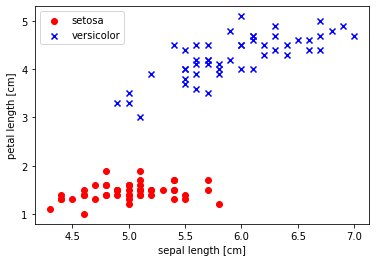

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100業めの目的変数を抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1, Iris-versicolorを１に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3列目を抽出
X = df.iloc[0:100, [0, 2]].values
# 品種setsaのプロット（赤の〇）
plt.scatter(X[:50, 0], X[0:50, 1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（青の×）
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
# 軸のラベルを設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に設置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

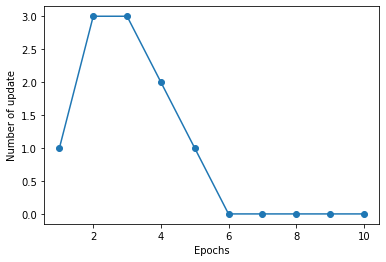

In [4]:
# パーセプトロンのオブジェクトを生成(インスタンス化)
ppn = Perceptron(eta=0.1, n_iter=10)
# 訓練データへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベル設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
# 図の表示
plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

  # 　マーカーとカラーマップんも準備
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定領域のプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  # 各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  # 予測結果を元のグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  # グリッドポイントの等高線をプロット
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  # 軸の範囲を設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # クラスごとに訓練データをプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

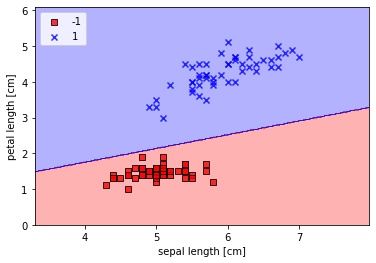

In [6]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

In [7]:
class AdalineGD(object):
  """ADAptive LInear NEuron分類器

  パラメータ
  ------------
  eta : float
    学習率（０.０より大きく1.0以下の値）
  n_iter : int
    訓練データの訓練回数
  random_state : int
    重みを初期化するための乱数シード
  
  属性
  ------------
  w_ : 1次元配列
    適合後の重み
  cost_ : リスト
    　各エポックでの誤差平方和のコスト関数
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, Y):
    """訓練データに適合させる
    
    パラメータ
    ------------
    X : (配列のようなデータ構造), shape = [n_samples, n_features]
      訓練データ
      n_exampleは訓練データの個数、n_featuresは特徴量の個数
    y : 配列のようなデータ構造, shape = [n_samples]
      目的変数

    戻り値
    ------------
    self : objest
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # w0を含む重みの初期化
    self.cost_ = []

    for i in range(self.n_iter): # 訓練回数分まで訓練データを反復
      net_input = self.net_input(X)
      # activationメソッドは単なる恒等関数であるため、
      # このコードは何の効果もないことに注意。代わりに、
      # 直接'output = self.net_input(X)'と記述することもできた。
      # activationメソッドの目的は、より概念的なものである。
      # つまり、（後ほど説明する）ロジスティック回帰の場合は、
      # ロジスティック回帰の分類器を実装するためにシグモイド関数に変更することができる
      output = self.activation(net_input)
      # 誤差y^(i) - φ(z^(i))の計算
      errors = (y - output)
      # w_1,...,w_mの更新
      # Δw_j = ηΣ_i(y^(i) - φ(z^(i)))x_j^(i)(j=1,...,m)
      self.w_[1:] += self.eta * X.T.dot(errors)
      # w_0の更新 : Δw_0 = η(y^(i) - φ(z^(i)))
      self.w_[0] += self.eta * errors.sum()
      # コスト関数の計算J(w) = 1/2Σ_i(y^(i) - φ(x^(i)))^2
      cost = (errors**2).sum() / 2.0
      # コストの格納
      self.cost_.append(cost)
    return self
    
  def net_input(self, X):
    """総入力を計算"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """線形活性化関数の出力を計算"""
    return X

  def predict(self, X):
    """1ステップ後のクラスラベルを返す"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

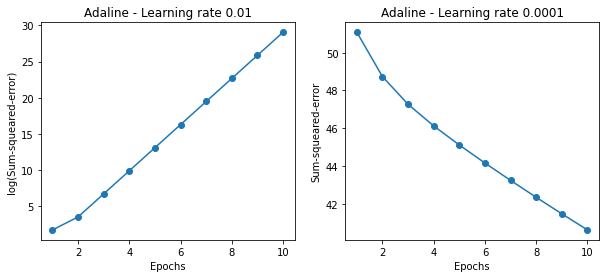

In [8]:
# 描画領域を１行２列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 勾配降下法によるADALINEの学習(学習率 eta=0.01)
adal = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1, len(adal.cost_)+1), np.log10(adal.cost_), marker='o')
# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squeared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
# 勾配降下法によるADALINEの学習(学習率 eta=0.0001)
adal2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[1].plot(range(1, len(adal2.cost_)+1), adal2.cost_, marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squeared-error')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
# 図の表示
plt.show()

In [9]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

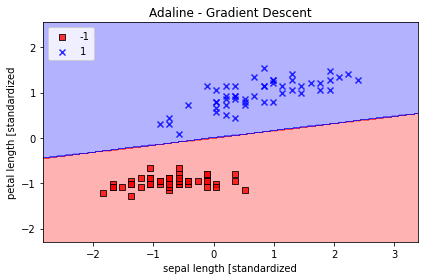

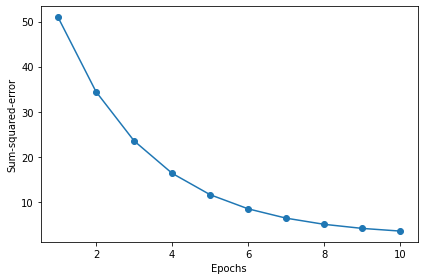

In [10]:
# 勾配降下法によるADALINEの学習(標準化後、学習率 eta=0.01)
ada_gd = AdalineGD(n_iter=10, eta=0.01)
# モデルの適合
ada_gd.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada_gd)
# タイトルの設定
plt.title('Adaline - Gradient Descent')
# 軸のラベル設定
plt.xlabel('sepal length [standardized')
plt.ylabel('petal length [standardized')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()
# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
# 図の表示
plt.tight_layout()
plt.show()

In [11]:
from numpy.random import seed

class AdalineSGD(object):
  """ADAptive LInear NEuron分類器

  パラメータ
  ------------
  eta : float
    学習率（０.０より大きく1.0以下の値）
  n_iter : int
    訓練データの訓練回数
  shuffle : bool（デフォルト: True）
    Trueの場合は、循環を回避するためにエポックごとに訓練データをシャッフル
  random_state : int
    重みを初期化するための乱数シード
  
  属性
  ------------
  w_ : 1次元配列
    適合後の重み
  cost_ : リスト
    　各エポックですべての訓練データの平均を求める誤差平方和コスト関数
  """
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
    # 学習率の初期化
    self.eta = eta
    # 訓練回数の初期化
    self.n_iter = n_iter
    # 重みの初期化フラグはFalseに設定
    self.w_initialized = False
    # 各エポックで訓練データをシャッフルするかどうかのフラグを初期化
    self.shuffle = shuffle
    # 乱数シードの設定
    self.random_state = random_state

  def fit(self, X, y):
    """訓練データに適合させる
    
    パラメータ
    ------------
    X : (配列のようなデータ構造), shape = [n_samples, n_features]
      訓練データ
      n_exampleは訓練データの個数、n_featuresは特徴量の個数
    y : 配列のようなデータ構造, shape = [n_samples]
      目的変数

    戻り値
    ------------
    self : objest
    """
    # 重みベクトルの生成
    self._initialize_weights(X.shape[1])
    # コストを格納するリストを生成
    self.cost_ = []
    # 訓練回数分まで訓練データを反復
    for i in range(self.n_iter): 
      # 指定された場合は訓練データをシャッフル
      if self.shuffle:
        X, y = self._shuffle(X, y)
      # 各訓練データのコストを格納するリストを生成
      cost = []
      # 各訓練データに対する計算
      for xi, target in zip(X, y):
        # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
        cost.append(self._update_weights(xi, target))
      # 訓練データの平均コストの計算
      avg_cost = sum(cost) / len(y)
      # 平均コストを格納
      self.cost_.append(avg_cost)
    return self
  def partial_fit(self, X, y):
    """重みを再初期化することなく訓練に適合させる"""
    # 初期化されていない場合は初期化を実行
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    # 目的変数yの要素数が２以上の場合は各訓練データの特徴量xiを目的変数targetで重みを更新
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    # 目的変数yの要素数が１の場合は訓練データ全体の特徴量Xと目的変数yで重みを更新
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    """訓練データをシャッフル"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]
  
  def _initialize_weights(self, m):
    """重みを小さな乱数で初期化"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """ADALINEの学習規則を用いて重みを更新"""
    # 活性化関数の出力の計算
    output = self.activation(self.net_input(xi))
    # 誤差の計算
    error = (target - output)
    # 重みw1, ..., wmの更新
    self.w_[1:] += self.eta * xi.dot(error)
    # 重みw0の更新
    self.w_[0] += self.eta * error
    # コストの計算
    cost = 0.5 * error**2
    return cost
    
  def net_input(self, X):
    """総入力を計算"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """線形活性化関数の出力を計算"""
    return X

  def predict(self, X):
    """1ステップ後のクラスラベルを返す"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

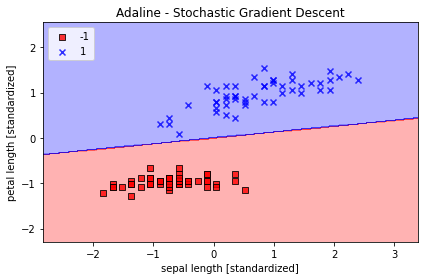

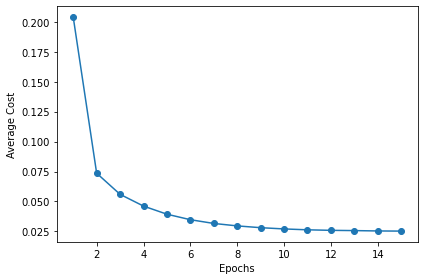

In [12]:
# 確率的勾配降下法によるADALINEの学習
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# モデルへの適合
ada_sgd.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada_sgd)
# タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
# 軸のラベルを設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
plt.tight_layout()
# プロットの表示
plt.show()
# エポックとコストの折れ線グラフのプロット
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
# プロットの表示
plt.tight_layout()
plt.show()

In [13]:
from sklearn import datasets
import numpy as np
# Irisデータセットをロード
iris = datasets.load_iris()
# 3, 4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# 一意なクラスラベルを出力
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [14]:
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [15]:
print('Label counts in y:', np.bincount(y))
print('Label counts in y_train:', np.bincount(y_train))
print('Label counts in y_test:', np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.linear_model import Perceptron
# エポック数40, 学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(eta0=0.1, random_state=1)
# 訓練データをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [18]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のデータ点の個数を表示
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [19]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [20]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  # 　マーカーとカラーマップんも準備
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定領域のプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  # 各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  # 予測結果を元のグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  # グリッドポイントの等高線をプロット
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  # 軸の範囲を設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # クラスごとに訓練データをプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
  # テストデータ点を目立たせる（点を〇で表示）
  if test_idx:
    # すべてのデータ点をプロット
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


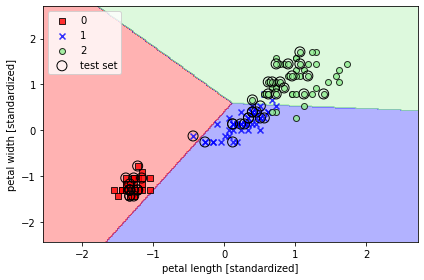

In [22]:
# 訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界をプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# グラフの表示
plt.tight_layout()
plt.show()

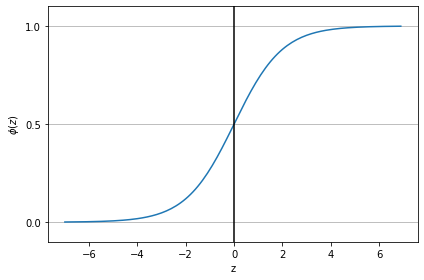

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# シグモイド関数を定義
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7, 7, 0.1)
# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
# 元のデータとシグモイド関数の出力をプロット
plt.plot(z, phi_z)
# 垂直線の追加(z=0)
plt.axvline(0.0, color='k')
# y軸の上限 / 下限を設定
plt.ylim(-0.1, 1.1)
# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y軸の目盛を追加
plt.yticks([0.0, 0.5, 1.0])
# Axesクラスのオブジェクトの取得
ax = plt.gca()
# y軸の目盛に合わせて水平グリッド線を追加
ax.yaxis.grid(True)
# グラフの表示
plt.tight_layout()
plt.show()

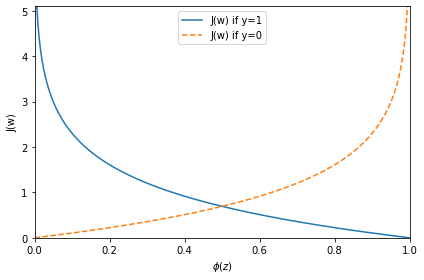

In [24]:
# y=1のコストを計算する関数
def cost_1(z):
  return - np.log(sigmoid(z))

# y=0のコストを計算する関数
def cost_0(z):
  return - np.log(1 - sigmoid(z))

# 0.1間隔で-10以上10未満のデータを生成
z = np.arange(-10, 10, 0.1)
# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
# y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]
# 結果のプロット
plt.plot(phi_z, c1, label='J(w) if y=1')
# y=0のコストを計算する関数を実行
c0 = [cost_0(x) for x in z]
# 結果のプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
# x軸とy軸の上限 / 下限を設定
plt.ylim(0.0, 5.1)
plt.xlim(0, 1)
# 軸のラベルを設定
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w)')
# 凡例の設定
plt.legend(loc='upper center')
# グラフの表示
plt.tight_layout()
plt.show()

In [25]:
class LogisticRegressionGD(object):
  """勾配降下法に基づくロジスティック回帰分類器

  パラメータ
  ------------
  eta : float
    学習率（０.０より大きく1.0以下の値）
  n_iter : int
    訓練データの訓練回数
  random_state : int
    重みを初期化するための乱数シード
  
  属性
  ------------
  w_ : 1次元配列
    適合後の重み
  cost_ : リスト
    　各エポックでのロジスティックコスト関数
  """
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """訓練データに適合させる
    
    パラメータ
    ------------
    X : (配列のようなデータ構造), shape = [n_samples, n_features]
      訓練データ
      n_exampleは訓練データの個数、n_featuresは特徴量の個数
    y : 配列のようなデータ構造, shape = [n_samples]
      目的変数

    戻り値
    ------------
    self : objest
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # w0を含む重みの初期化
    self.cost_ = []

    # 訓練回数分まで訓練データを反復処理
    for i in range(self.n_iter): 
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      # 誤差平方和のコストではなくロジスティック回帰のコストを計算することに注意
      cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
      # エポックごとのコストを格納
      self.cost_.append(cost)
    return self
    
  def net_input(self, X):
    """総入力を計算"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    """ロジスティックシグモイド活性化関数を計算"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    """1ステップ後のクラスラベルを返す"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)
    # 以下に等しい
    # return np.where(self.activate(self.net_input(X)) >= 0.5, 1, 0)

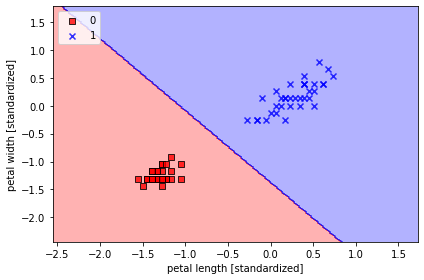

In [26]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
# ロジスティック回帰のインスタンスを作成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# モデルを訓練データと適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)
# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


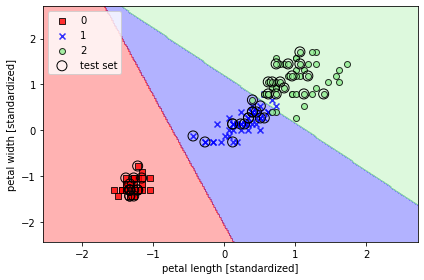

In [27]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
# 訓練データをモデルに適合させる
lr.fit(X_train_std, y_train)
# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]') # 軸のラベルを設定
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left') # 凡例を設定（左上に表示）
plt.tight_layout() # グラフを表示
plt.show()

In [28]:
# from sklearn.linear_model import LogisticRegression
# # ロジスティック回帰のインスタンスを生成
# lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='multinomial')
# # 訓練データをモデルに適合させる
# lr.fit(X_train_std, y_train)
# # 決定境界をプロット
# plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
# plt.xlabel('petal length [standardized]') # 軸のラベルを設定
# plt.ylabel('petal width [standardized]')
# plt.legend(loc='upper left') # 凡例を設定（左上に表示）
# plt.tight_layout() # グラフを表示
# plt.show()

In [29]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [30]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [31]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [32]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [33]:
# 単一レコードの予測を行う場合は２次元化する必要がある
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

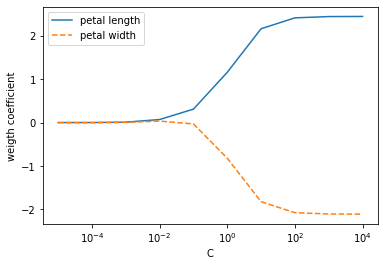

In [34]:
# 空のリストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []
# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
  lr.fit(X_train_std, y_train)
  # 重み係数を格納
  weights.append(lr.coef_[1])
  # 逆正則化パラメータを格納
  params.append(10.**c)

# 重み係数をNumpy配列に変換
weights = np.array(weights)
# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length') 
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weigth coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
# 横軸を対数スケールに設定
plt.xscale('log')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


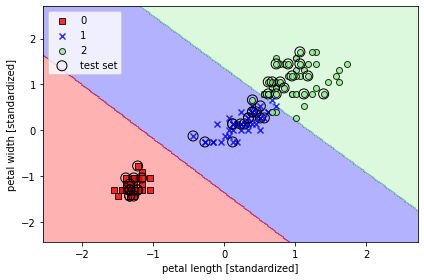

In [35]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
svm = SVC(kernel='linear', C=1.0, random_state=1)
# 線形SVMのモデルに訓練データを適合させる
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.linear_model import SGDClassifier
# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')
# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')
# 確率的勾配降下法バージョンのSVM（損失関数=ヒンジ関数）を生成
svm = SGDClassifier(loss='hinge')

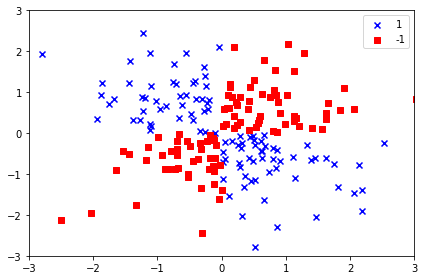

In [37]:
import matplotlib.pyplot as plt
import numpy as np
# 乱数シードを指定
np.random.seed(1)
# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2)
# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# 排他的論理和の値が真の場合は1、偽の場合は-1を割り当てる
y_xor = np.where(y_xor, 1, -1)
# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
# 軸の範囲を設定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

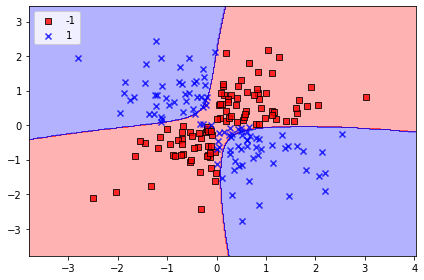

In [38]:
# RBFカーネルによるSVMのインスタンスを生成
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


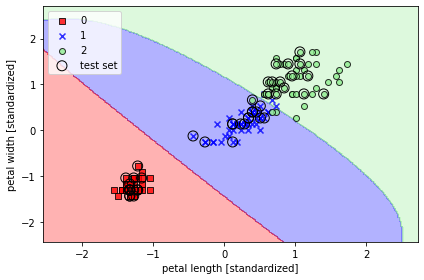

In [39]:
# RBFカーネルによるSVMのインスタンスを生成（2つのパラメータを変更）
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


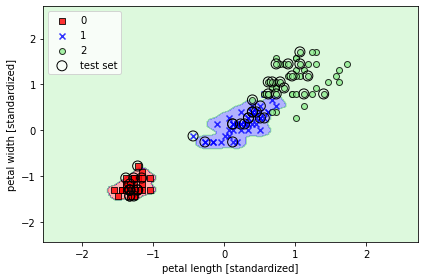

In [40]:
# RBFカーネルによるSVMのインスタンスを生成（γパラメータを変更）
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

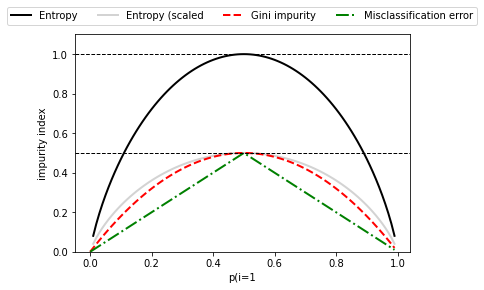

In [41]:
import matplotlib.pyplot as plt
import numpy as np
# ジニ不純度の関数を定義
def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1 - p))

# エントロピーの関数を定義
def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2(1 - p)

# 分類誤差の関数を定義
def error(p):
  return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成（0から0.99まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)
# 配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
# エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], 
                         ['Entropy', 'Entropy (scaled', 'Gini impurity', 'Misclassification error'], 
                         ['-', '-', '--', '-.'], 
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
# 凡例の設定（中央の上に配置）
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
# 2本の水平の波線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
# 横軸の上限 / 下限
plt.ylim([0, 1.1])
plt.xlabel('p(i=1')
plt.ylabel('impurity index')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


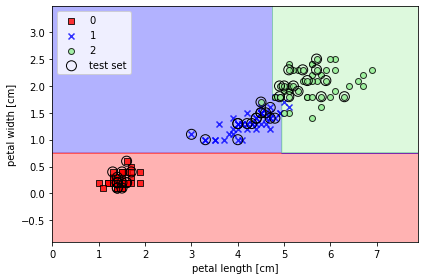

In [42]:
from sklearn.tree import DecisionTreeClassifier
# ジニ不純度を指標とする決定木のインスタンスを生成
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
# 決定木モデルを訓練データに適合させる
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

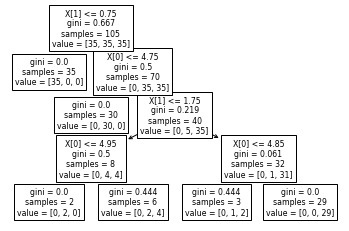

In [43]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [44]:
!pip3 install pydotplus

In [45]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True, 
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['petal length', 'petal width'], 
                           out_file=None)
graph =graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


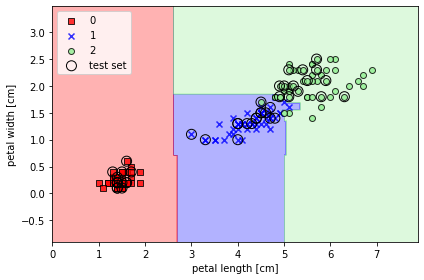

In [46]:
from sklearn.ensemble import RandomForestClassifier
# ジニ不純度を指標とするランダムフォレストのモデルを適合させる
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
# 訓練データにランダムフォレストのモデルを適合させる
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


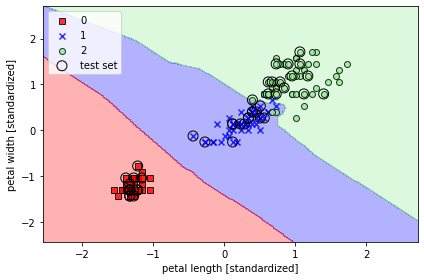

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# k最近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# 訓練データにk最近傍法のモデルを適合させる
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
from io import StringIO
# サンプルデータを作成
csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0,'''
# Python 2.7を使っている場合は文字列をunicodeに変換する必要がある
# csv_data = unicode(csv_data)
# サンプルデータを読み込む
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [49]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [50]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [51]:
# 欠損値を含む列をp削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [52]:
# すべての列がNaNである行だけ削除（すべての値がNaNである行はないため、配列全体が返される）
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [53]:
# 非NaN値が4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [54]:
# 特定の列（この場合は'C'）にNaNが含まれている行だけを削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [55]:
from sklearn.impute import SimpleImputer
import numpy as np
# 欠損値保管のインスタンスを作成
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
# データを適合
imr.fit(df.values)
# データを適合
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [56]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [57]:
import pandas as pd
# サンプルデータを生成（Tシャツの色・サイズ・価格・クラスラベル）
df = pd.DataFrame([
                   ['green', 'M', 10.1, 'class2'], 
                   ['red', 'L', 13.5, 'class1'], 
                   ['blue', 'XL', 15.3, 'class2']])
# 列名を設定
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [58]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
# Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [59]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [60]:
import numpy as np
# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [61]:
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [62]:
# 整数とクラスラベルを対応させるディクショナリを生成
inv_calss_mapping = {v: k for k, v in class_mapping.items()}
# 整数からクラスラベルに変換
df['classlabel'] = df['classlabel'].map(inv_calss_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [63]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを生成
class_le = LabelEncoder()
# クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [64]:
# クラスラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [65]:
from re import L
# Tシャツの色、サイズ、価格を抽出
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [66]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
# one-hot エンコーダを生成
color_ohe = OneHotEncoder()
# one-hot エンコーダを実行
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [67]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([('onhot', OneHotEncoder(), [0]), ('notihng', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [68]:
# one-hot エンコーディングを実行
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [69]:
# one-hot エンコーダの生成
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([('onehot', color_ohe, [0]), ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [70]:
# wineデータセットを読み込む
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None
)
# 列名を設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
# クラスラベルを表示
print('Class labels', np.unique(df_wine['Class label']))
# wineデータセットの先頭5行を表示
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
from sklearn.model_selection import train_test_split
# 特徴量とクラスラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# 訓練データとテストデータに分割（全体の30%をテストデータにする）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [72]:
from sklearn.preprocessing import MinMaxScaler
# min-maxスケーリングのインスタンスを作成
mms = MinMaxScaler()
# 訓練データをスケーリング
X_train_norm = mms.fit_transform(X_train)
# テストデータをスケーリング
X_test_norm = mms.transform(X_test)

In [73]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [74]:
from sklearn.preprocessing import StandardScaler
# 標準化のインスタンスを生成（平均=0、標準偏差=1に変換）
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
# L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [76]:
# L1正則化ロジスティック回帰のインスタンスを生成：逆正則化パラメータC=1.0はデフォルト値であり、
# 値を大きくしたり小さくしたりすると、正則化の効果を強めたり弱めたりできる
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# 訓練データに適合
lr.fit(X_train_std, y_train)
# 訓練データに対する正解率の表示
print('Training accuracy:', lr.score(X_train_std, y_train))
# テストデータに対する正解率の表示
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [77]:
lr.intercept_

array([-1.26357273, -1.2159133 , -2.37030926])

In [78]:
# 重み係数の表示
lr.coef_

array([[ 1.24548259,  0.18074234,  0.74644317, -1.16439284,  0.        ,
         0.        ,  1.16089728,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55702223,  2.50930227],
       [-1.53723715, -0.38717111, -0.99498309,  0.36462824, -0.05964223,
         0.        ,  0.66822182,  0.        ,  0.        , -1.93401758,
         1.23425596,  0.        , -2.23234257],
       [ 0.13575227,  0.16830543,  0.3572118 ,  0.        ,  0.        ,
         0.        , -2.43827593,  0.        ,  0.        ,  1.56379034,
        -0.81905107, -0.49229508,  0.        ]])

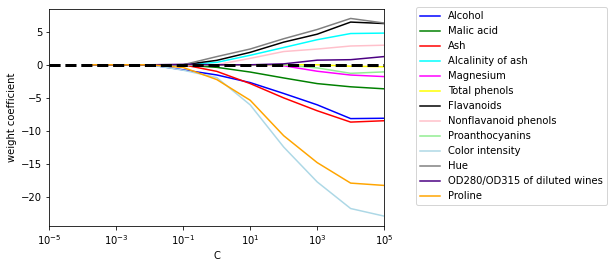

In [79]:
import matplotlib.pyplot as plt
# 描画の準備
fig = plt.figure()
ax = plt.subplot(111)
# 各係数の色のリスト
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
# 空のリストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []
# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

# 重み係数をNumpy配列に変換
weights = np.array(weights)
# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
  # 横軸を逆正則化パラメータ。縦軸を係数とした折れ線グラフ
  plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

# y=0に黒い波線を引く
plt.axhline(0, color='black', linestyle='--', linewidth=3)
# 横軸の範囲の設定
plt.xlim([10**(-5), 10**5])
# 軸のラベルを設定
plt.ylabel('weight coefficient')
plt.xlabel('C')
# 横軸を対数スケールに変換
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [80]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  """
  逐次後退選択（sequential backward selection）を実行するクラス
  """

  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring # 特徴量を評価する指標
    self.estimator = clone(estimator) # 推定器
    self.k_features = k_features # 選択する特徴量の個数
    self.test_size = test_size # テストデータの割合
    self.random_state = random_state # 乱数シードを固定するrandom_state

  def fit(self, X, y):
    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
    # すべての特徴量の個数、列インデックス
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    # すべての特徴量を用いてスコアを算出
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score] # スコアの格納
    # 特徴量が指定した個数になるまで処理を繰り返す
    while dim > self.k_features:
      scores = [] # 空のインデックスのリストを格納
      subsets = [] # 空の列インデックスリストを作成
      # 特徴量の部分集合を表す列インデックスの組み合わせごとに処理を格納
      for p in combinations(self.indices_, r=dim - 1):
        # スコアを算出して格納
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        # 特徴量の部分集合を表す列インデックスのリストを格納
        subsets.append(p)
      
      # 最良のスコアのインデックスを抽出
      best = np.argmax(scores)
      # 最良のスコアとなる列インデックスを抽出して格納
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      # 特徴量の個数を1つだけ減らして次のステップへ
      dim -= 1
      # スコアを格納
      self.scores_.append(scores[best])

    # 最後に格納したスコア
    self.k_score_ = self.scores_[-1]
    return self

  def transform(self, X):
    # 抽出した特徴量を返す
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    # 指定された列番号indicesの特徴量を抽出してモデルを適合
    self.estimator.fit(X_train[:, indices], y_train)
    # テストデータを用いてクラスラベルを予測
    y_pred = self.estimator.predict(X_test[:, indices])
    # 真のクラスラベルと予測値を用いてスコアを算出
    score = self.scoring(y_test, y_pred)
    return score

In [81]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# k最近傍法分類器のインスタンスを生成（近傍点数=5）
knn = KNeighborsClassifier(n_neighbors=5)
# 逐次後退選択のインスタンスを生成（特徴量の個数が1になるまで特徴量を選択）
sbs = SBS(knn, k_features=1)
# 逐次後退選択を実施
sbs.fit(X_train_std, y_train)

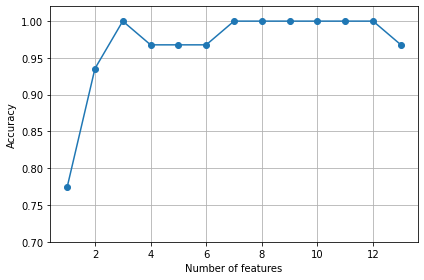

In [82]:
# 特徴量の個数のリスト（13, 12, ..., 1）
k_feat = [len(k) for k in sbs.subsets_]
# 横軸を特徴量の個数、縦軸をスコアとした折れ線グラフのプロット
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [83]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [84]:
# 13個すべての特徴量を用いてモデルを適合
knn.fit(X_train_std, y_train)
# 訓練の正解率を出力
print('Training accuracy:', knn.score(X_train_std, y_train))
# テストの正解率を出力
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [85]:
# 3つの特徴量を用いてモデルを適合
knn.fit(X_train_std[:, k3], y_train)
# 訓練の正解率を出力
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
# テストの正解率を出力
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


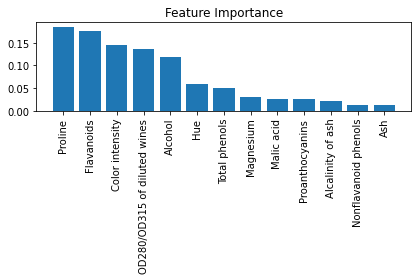

In [86]:
from sklearn.ensemble import RandomForestClassifier
# Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]
# ランダムフォレストオブジェクトの生成（決定木の個数=500）
forest = RandomForestClassifier(n_estimators=500, random_state=1)
# モデルの適合
forest.fit(X_train, y_train)
# 特徴量重要度を抽出
importances = forest.feature_importances_
# 重要度の降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]
# 重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [87]:
from sklearn.feature_selection import SelectFromModel
# 特徴量選択オブジェクトを生成（重要度の閾値を0.1に設定）
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
# 特徴量を抽出
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [88]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 2列以降のデータをXに、1列目のデータをyに格納
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
# 平均と標準偏差を用いて標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [90]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # 共分散行列を作成
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # 固有値と固有ベクトルを計算
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


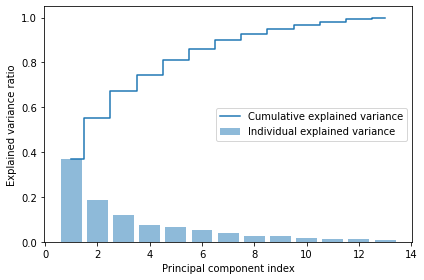

In [91]:
# 固有値を合計
tot = sum(eigen_vals)
# 分散説明率を計算
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
# 分散説明率の棒グラフを作成
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='Individual explained variance')
# 分散説明率の累積和の階段グラフを作成
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [92]:
# （固有値, 固有ベクトル）のタプルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# （固有値, 固有ベクトル）のタプルを大きいものから順に並び替え
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [93]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [94]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [95]:
X_train_pca = X_train_std.dot(w)

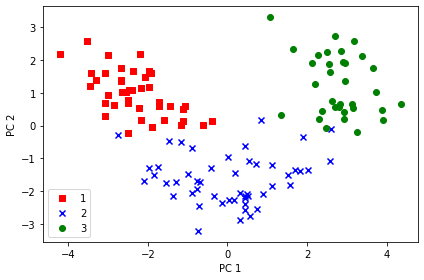

In [96]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
# 「クラスラベル」「点の色」「点の種類」の組み合わせからなるリストを生成してプロット
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [97]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにデータ点をプロット
    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

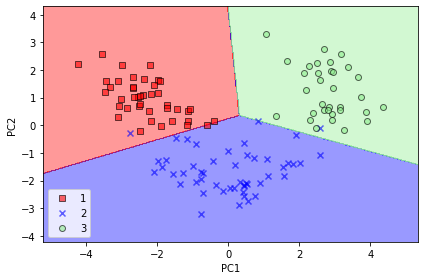

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# 主成分数を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# 次元削減
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# 削除したデータセットでロジスティック回帰モデルを適合
lr.fit(X_train_pca, y_train)
# 決定境界をプロット
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

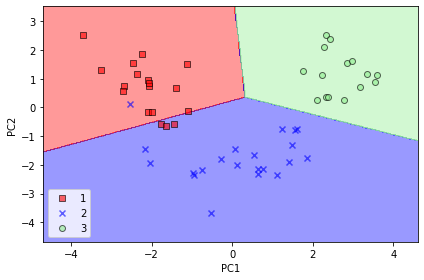

In [99]:
# 決定境界をプロット
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [100]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
# 分散説明率を計算
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [101]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
  print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [102]:
d = 13 # 特徴量の個数
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train==label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [103]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [104]:
d = 13 # 特徴量の個数
S_W = np.zeros((d, d))
for label in range(1, 4):
  class_scatter = np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [105]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # 特徴量の個数
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i+1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)
  mean_overall = mean_overall.reshape(d, 1)
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

In [106]:
# inv関数で逆行列、dot関数で行列積、eig関数で固有値を計算
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [107]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalus in descending order:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalus in descending order:

349.61780890599397
172.7615221897938
3.3428382148413644e-14
2.842170943040401e-14
2.5545786180111397e-14
1.753393918073425e-14
1.753393918073425e-14
1.657919399596089e-14
1.657919399596089e-14
8.242524002707208e-15
8.242524002707208e-15
6.36835506006027e-15
2.97463437554573e-15


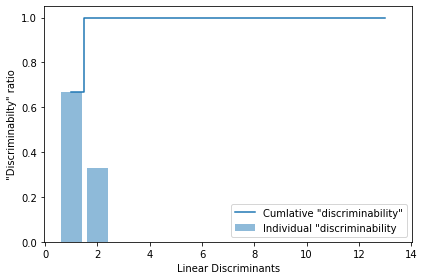

In [108]:
# 固有値の実数部の総和を求める
tot = sum(eigen_vals.real)
# 分散説明率とその累積和を計算
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='Individual "discriminability')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumlative "discriminability"')
plt.ylabel('"Discriminabilty" ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [109]:
# 2つの固有ベクトルから変換行列を作成
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


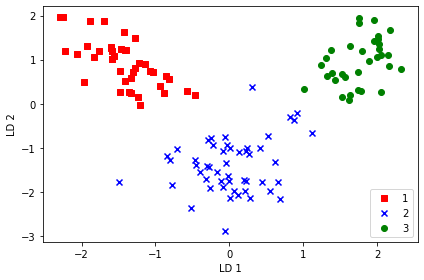

In [110]:
# 標準化した訓練データに変換行列を掛ける
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# 次元数を指定して、LDAのインスタンスを作成
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

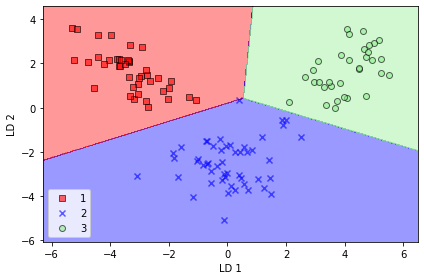

In [112]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

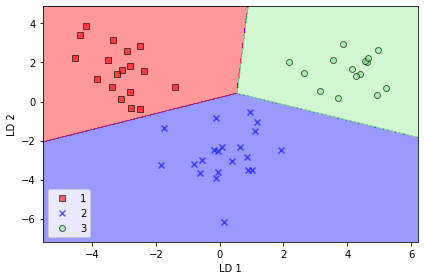

In [113]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [114]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  """RBFカーネルPCAの実装
  パラメータ
  ----------
  X: {Numpy array}, shape = [n_example, n_features]
  gamma: float
    RBFカーネルのチューニングパラメータ
  n_components: int
    返される主成分の個数
  戻り値
  ----------
  X_pc: {Numpy array}, shape = [n_example, n_features]
    射影されたデータセット
  """
  # M×N次元のデータセットでペアゴロのユークリッド距離の２乗を計算
  sq_dists = pdist(X, 'sqeuclidean')

  # ペアごとの距離を正方行列に変換
  mat_sq_dists = squareform(sq_dists)

  # 対称カーネル行列を計算
  K = exp(-gamma * mat_sq_dists)

  # カーネル行列を中心化
  N = K.shape[0]
  one_n = np.ones((N, N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  # 中心化されたカーネル行列から固有対を取得：scipy.linalg.eighはそれらを昇順で返す
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

  # 上位k個の固有ベクトル（射影されたデータ点）を収集
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])

  return X_pc

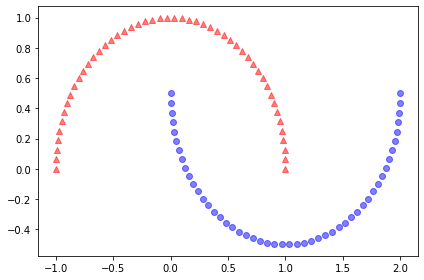

In [115]:
# 2つの半月データを作成してプロット
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

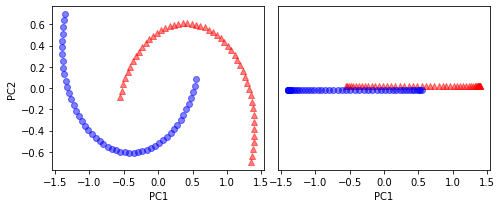

In [116]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_kpca = scikit_pca.fit_transform(X)
# グラフの数と配置、サイズを指定
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
# 1番目のグラフ領域に散布図をプロット
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
# 2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


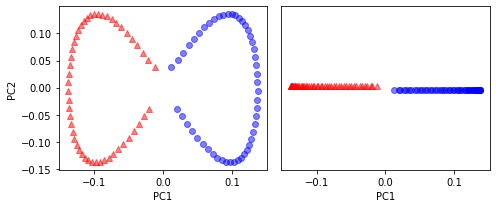

In [117]:
# from matplotlib.ticker import FormatStrFormatter
# カーネルPCA関数を実行（データ、チューニングパラメータ、次元数を指定）
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

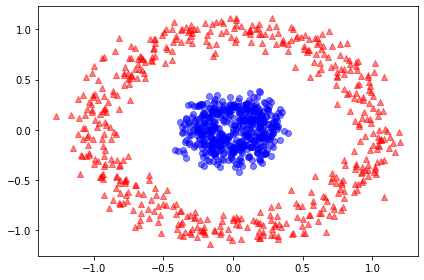

In [118]:
# 同心円用のデータを作成してプロット
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

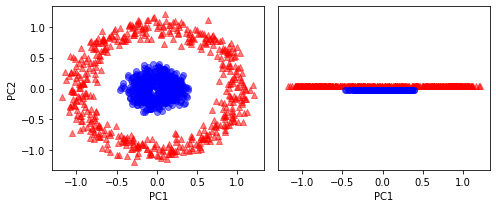

In [119]:
# データをPCAで反感してからプロット
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


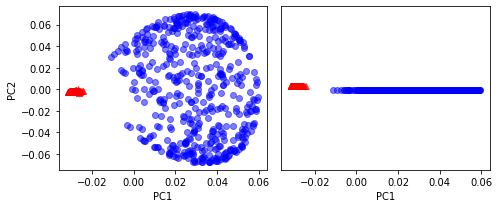

In [120]:
# データをRBFカーネルPCAで変換してからプロット
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

In [121]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  """RBFカーネルPCAの実装
  パラメータ
  ----------
  X: {Numpy array}, shape = [n_example, n_features]
  gamma: float
    RBFカーネルのチューニングパラメータ
  n_components: int
    返される主成分の個数
  戻り値
  ----------
  alphas {Numpy ndarray}, shape = [n_examples, k_features]
    射影されたデータセット
  lambdas: list
    固有値
  """
  # M×N次元のデータセットでペアゴロのユークリッド距離の２乗を計算
  sq_dists = pdist(X, 'sqeuclidean')

  # ペアごとの距離を正方行列に変換
  mat_sq_dists = squareform(sq_dists)

  # 対称カーネル行列を計算
  K = exp(-gamma * mat_sq_dists)

  # カーネル行列を中心化
  N = K.shape[0]
  one_n = np.ones((N, N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  # 中心化されたカーネル行列から固有対を取得：scipy.linalg.eighはそれらを昇順で返す
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

  # 上位k個の固有ベクトル（射影されたデータ点）を収集
  alphas = np.column_stack([eigvecs[:, i] for i in range(n_components)])
  
  # 　対応する固有値を収集
  lambdas = [eigvals[i] for i in range(n_components)]
  return alphas, lambdas

In [122]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


In [123]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [124]:
x_proj = alphas[25]
x_proj

array([0.0788])

In [125]:
def project_x(x_new, X, gamma, alphas, lambdas):
  pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
  k = np.exp(-gamma * pair_dist)
  return k.dot(alphas / lambdas)

In [126]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

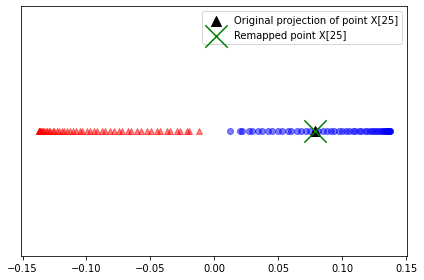

In [127]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_reproj, 0, color='black', label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

In [128]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

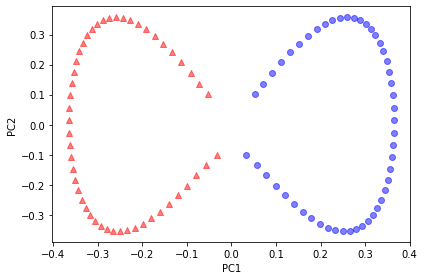

In [129]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [130]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [131]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [132]:
le.transform(['M', 'B'])

array([1, 0])

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
# 連結する処理としてスケーリング、主成分分析、ロジスティック回帰を指定
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [135]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
# 分割元データ、分割数、乱数生成器の状態を指定し、層化k分割交差検証イテレータを表すStratifiedKFoldクラスのインスタンス化
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
# イテレータのインデックスと要素数をループ処理：（上から順に）
# データをモデルに適合
# テストデータの正解率を算出
# リストに正解率を追加
# 分割の番号、0以上の要素数、正解率を出力
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
# 正解率の平均と標準偏差を出力
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


In [136]:
from sklearn.model_selection import cross_val_score
# 交差検証のcross_val_score関数でモデルの正解率を算出
# 推定器estimator、訓練データX、予測値y、分割数CV、CPU数n_jobsを指定
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.9348 0.9348 0.9565 0.9565 0.9348 0.9556 0.9778 0.9333 0.9556 0.9556]
CV accuracy: 0.950 +/- 0.014


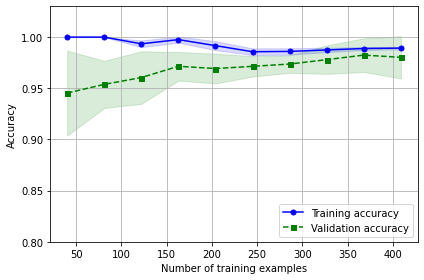

In [137]:
# 学習曲線
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=10000))
# learning_curve関数で交差検証による正解率を算出
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
# fill_between関数で平均+-標準偏差の幅を塗りつぶす
# 訓練データのサイズtrain_size、透明度alpha、カラー'blue'を引数に指定
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

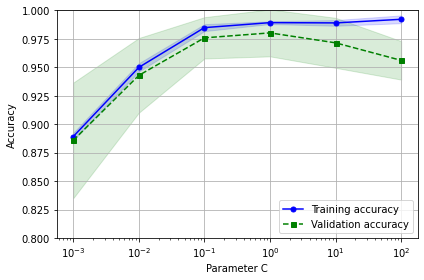

In [138]:
# 検証曲線
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# validation_curve関数によりモデルのパラメータを変化させ、交差検証による正解率を算出
# clf_CはLogisticRegressionオブジェクトのパラメータ
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, 
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
# ハイパーパラメータ値のリストparam_gridを指定し、グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, cv=10, refit=True, n_jobs=-1)
gs = gs.fit(X_train, y_train)
# モデルの最良スコアを出力
print(gs.best_score_)
# 最良スコアとなるパラメータ値を出力
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [140]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


In [141]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [142]:
from sklearn.tree import DecisionTreeClassifier
# ハイパーパラメータ値として決定木の深さパラメータを指定し、グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.934 +/- 0.016


In [143]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
# テストと予測のデータから混同行列を生成
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


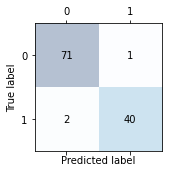

In [144]:
# 図のサイズを指定
fig, ax = plt.subplots(figsize=(2.5, 2.5))
# matshow関数で行列からヒートマップを描画
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]): # クラス0の繰り返し
  for j in range(confmat.shape[1]): # クラス1の繰り返し処理
    ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center') # 件数を表示

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [145]:
# 適合率、再現率、F1スコアを出力
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


In [146]:
# カスタムの性能指標を出力
from sklearn.metrics import make_scorer, f1_score
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
pram_grid = [{'svc_C': c_gamma_range, 'svc_kernel': ['linear']}, 
             {'svc_C': c_gamma_range, 'svc_gamma': c_gamma_range, 'svc_kernel': ['rbf']}]
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9880771478667446
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


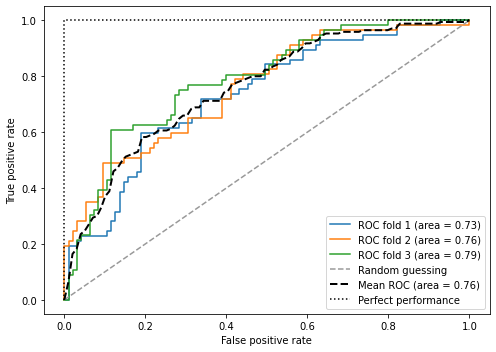

In [147]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
# スケーリング、主成分分析、ロジスティック回帰を指定して、Pipelineクラスをインスタンス化
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', C=100.0))
# 2つの特徴量を抽出
X_train2 = X_train[:, [4, 14]]
# 層化k分割交差検証イテレータを表すStratifiedKFoldクラスをインスタンス化
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
# 0から1までの間の100個の要素を生成
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv):
  # predict_probaメソッドで確率を予測、fitメソッドでモデルに適合させる
  probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
  # roc_curve関数でROC曲線の性能を計算してプロット
  fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr) # FPR（X軸）とTPR（Y軸）を線形補間
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr) # 曲線下面積（AUC）を計算
  plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

# 当て推量をプロット
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')

# FPR、TPR、　ROC AUCそれぞれの平均を計算してプロット
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
# 完全に予測が正解したときのROC曲線をプロット
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance')
# グラフの各項目を指定
plt.xlabel([-0.05, 1.05])
plt.ylabel([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [148]:
pre_score = make_scorer(score_func=precision_score, pos_label=1, greater_is_better=True, average='micro')

In [149]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [150]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred==y_imb) * 100

89.92443324937027

In [151]:
from sklearn.utils import resample
print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

# データ点の個数がクラス01と同じになるまで新しいデータ点を復元抽出
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1], y_imb[y_imb == 1], replace=True, n_samples=X_imb[y_imb == 0].shape[0], random_state=123)
print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


In [152]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [153]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [154]:
from scipy.special import comb
import math
def ensemble_error(n_classifier, error):
  k_start = int(math.ceil(n_classifier / 2.))
  probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k) for k in range(k_start, n_classifier + 1)]
  return sum(probs)
ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

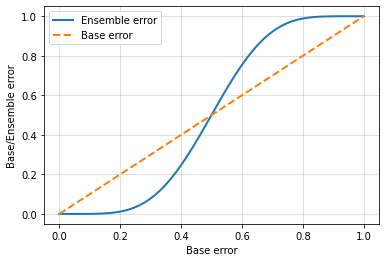

In [155]:
from sklearn import ensemble
from pandas._libs.tslibs.conversion import ensure_datetime64ns
import numpy as np
import matplotlib.pyplot as plt
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]
plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()

In [156]:
import numpy as np
np.argmax(np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6]))

1

In [157]:
ex = np.array([[0.9, 0.1], [0.8, 0.2], [0.4, 0.6]])
p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
print(p)
np.argmax(p)

[0.58 0.42]


0

In [158]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
  """多数決アンサンブル分類器

  パラメータ
  ---------
  classifier : array-like, shape = [n_clasiifier]
    アンサンブルの様々な分類器
  
  vote : str, {'classlabel', 'probability'} (default: 'classlabel')
    'classlabel'の場合、クラスラベルの予測はクラスラベルのargmaxに基づく
    'probability'の場合、クラスラベルの予測はクラスラベルの所属確率のargmaxに基づく（分類器が調整済みであることが推奨される）
  
  weights : array-like, shape = [n_classifiers] (optional, default=None)
    'int'または'float'型の値のリスト　が提供された場合、分類器は重複度で重み付けされる
    'weights=None'の場合は均一な重みを使用
  """

  def __init__(self, classifiers, vote='classlabel', weights=None):
    self.classifiers = classifiers
    self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
    self.vote = vote
    self.weights = weights

  def fit(self, X, y):
    """分類器を学習させる

    パラメータ
    ----------
    X : {array-like, sparse matrix}, shape = [n_examples, n_features]
      訓練データからなる行列
    y : array-like, shape = [n_examples]
      クラスラベルのベクトル
    
    戻り値
    ---------
    self : object
    """
    if self.vote not in ('probability', 'classlabel'):
      raise ValueError("vote must be 'probability' or 'classlabel'; got (vote=%r)" % self.vote)

    if self.weights and len(self.weights) != len(self.classifiers):
      raise ValueError("Number of clasifiers and weights must be equal; got %d weights, %d classifiers" % (len(self.weights), len(self.classifiers)))

    # LabelEncoderを使ってクラスラベルが0から始まるようにエンコードする
    # self.predictのnp.argmax呼び出しで重要となる
    self.lablenc_ = LabelEncoder()
    self.lablenc_.fit(y)
    self.classes_ = self.lablenc_.classes_
    self.classifiers_ = []
    for clf in self.classifiers:
      fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
      self.classifiers_.append(fitted_clf)
    return self

  def predict(self, X):
    """Xのクラスラベルを予測する

    パラメータ
    ---------
    X : {array-like, sparse matrix}, shape = [n_examples, n_features]
      訓練データからなる行列

    戻り値
    ----------
    maj_vote : array-like, shape = [n_examples]
      予測されたクラスラベル
    
    """
    if self.vote == 'probability':
      maj_vote = np.argmax(self.predict_proba(X), axis=1)
    else: # 'classlabel'での多数決
      
      # clf.predict呼び出しの結果を収集
      predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T

      # 各データ点のクラス確率に重みを掛けて足し合わせた値が最大となる
      # 列番号を配列として返す
      maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)), axis=1, arr=predictions)

      # 各データ点に確率の最大値を与えるクラスラベルを抽出
      maj_vote = self.lablenc_.inverse_transform(maj_vote)
      return maj_vote

  def predict_proba(self, X):
    """Xのクラス確率を予測する
    
    パラメータ
    ----------
    X : {array-like, sparse matrix}, shape = [n_examples, n_features]
      訓練ベクトル：n_examplesはデータ点の個数、n_featuresは特徴量の個数

    戻り値
    ----------
    avg_proba : array-like, shape = [n_examples, n_classes]
      各データ点に対する各クラスで重みをつけた平均確率
    """
    probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
    avg_proba = np.average(probas, axis=0, weights=self.weights)
    return avg_proba

  def get_params(self, deep=True):
    """GridSearchの実行時に分類器のパラメータ名を取得"""
    if not deep:
      return super(MajorityVoteClassifier, self).get_params(deep=False)
    else:
      # キーを"分類器の名前__パラメータ名"
      # 値をパラメータの値とするディクショナリを生成
      out = self.named_classifiers.copy()
      for name, step in self.named_classifiers.items():
        for key, value in step.get_params(deep=True).items():
          out['%s__%s' % (name, key)] = value
      return out

In [159]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
clf1 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
  scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
  print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


In [162]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
  print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]
ROC AUC: 0.98 (+/- 0.05) [Majority voting]


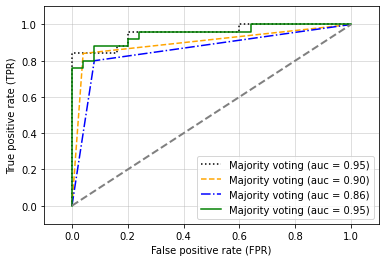

In [163]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, lable, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
  # 陽性クラスのラベルは1であることが前提
  y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
  roc_auc = auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

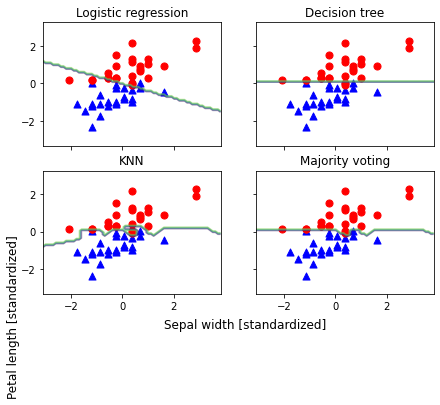

In [164]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
from itertools import product
# 決定領域を描画する最小値、最大値
x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1
# グリッドポイントを生成
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# 描画領域を２行２列に分割
f, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(7, 5))
# 決定領域のプロット、青や赤の散布図の作成などを実行
# 変数idxは各分類器を描画する行と列の位置を表すタプル
for idx, clf, tt in zip(product([0, 1], [0, 1]), all_clf, clf_labels):
  clf.fit(X_train_std, y_train)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx[0], idx[1]].contour(xx, yy, Z, alpha=0.3)
  axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='blue', marker='^', s=50)
  axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='red', marker='o', s=50)
  axarr[idx[0], idx[1]].set_title(tt)

plt.text(-3.5, -5., s='Sepal width [standardized]', ha='center', va='center', fontsize=12)
plt.text(-12.5, -4.5, s='Petal length [standardized]', ha='center', va='center', fontsize=12, rotation=90)
plt.show()

In [165]:
mv_clf.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 1,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': 0,
 'decisiontreeclassifier__splitter': 'best',
 'pipeline-1': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 'pipeline-1__clf': LogisticRegression(C=0.001, random_state=1),
 'pipeline-1__clf__C': 0.001,
 'pipeline-1__clf__class_weight': None,
 'pipeline-1__clf__dual': False,
 'pipeline-1__clf__fit_int

In [166]:
from sklearn.model_selection import GridSearchCV
params = {'decisiontreeclassifier__max_depth': [1, 2], 'pipeline-1__clf__C': [0.001, 0.1, 100.0]}
grid = GridSearchCV(estimator=mv_clf, param_grid=params, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
  print('%0.3f +/- %0.2f %r' % (grid.cv_results_['mean_test_score'][r], grid.cv_results_['std_test_score'][r] / 2.0, grid.cv_results_['params'][r]))
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}
Best parameters: {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
Accuracy: 0.98


In [167]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
# クラス1を削除
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [168]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [169]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)

In [170]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train / test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train / test accuracies 1.000/0.833


In [171]:
bag = bag.fit(X_train, y_train)
y_trian_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train / test accuracies %.3f/%.3f' % (bag_train, bag_test))

Bagging train / test accuracies 1.000/0.917


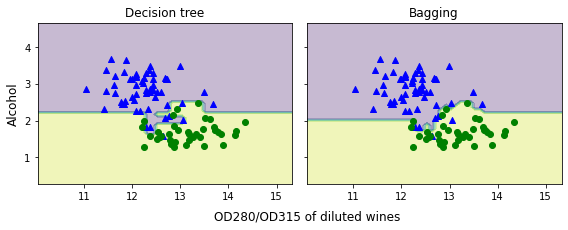

In [172]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))
for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='green', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2, s='OD280/OD315 of diluted wines', ha='center', va='center', fontsize=12, transform=axarr[1].transAxes)
plt.show()

In [173]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.916/0.875


In [174]:
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.917


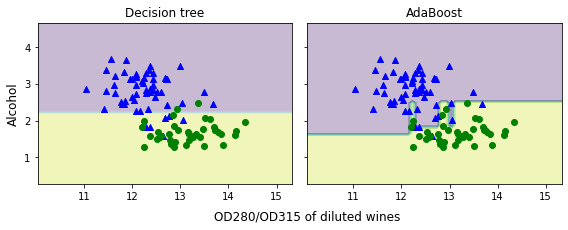

In [175]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))
for idx, clf, tt in zip([0, 1], [tree, ada], ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='green', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2, s='OD280/OD315 of diluted wines', ha='center', va='center', fontsize=12, transform=axarr[1].transAxes)
plt.show()

In [176]:
import os
import sys
import tarfile
import time
import urllib.request


source = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
target = 'aclImdb_v1.tar.gz'


def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = progress_size / (1024.**2 * duration)
    percent = count * block_size * 100. / total_size

    sys.stdout.write("\r%d%% | %d MB | %.2f MB/s | %d sec elapsed" %
                    (percent, progress_size / (1024.**2), speed, duration))
    sys.stdout.flush()


if not os.path.isdir('aclImdb') and not os.path.isfile('aclImdb_v1.tar.gz'):
    urllib.request.urlretrieve(source, target, reporthook)

100% | 80 MB | 5.50 MB/s | 14 sec elapsed

In [177]:
if not os.path.isdir('aclImdb'):

    with tarfile.open(target, 'r:gz') as tar:
        tar.extractall()

In [178]:
!pip install pyprind

In [179]:
import pyprind
import pandas as pd
import os
# 'bashpath'　の値を展開した映画レビューデータセットのディレクトリに置き換える
basepath = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for s in ('test', 'train'):
  for l in ('pos', 'neg'):
    path = os.path.join(basepath, s, l)
    for file in sorted(os.listdir(path)):
      with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
        txt = infile.read()
      df = df.append([[txt, labels[l]]], ignore_index=True)
      pbar.update()
df.columns = ['review', 'sentiment']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:53


In [180]:
import numpy as np
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

In [181]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [182]:
df.shape

(50000, 2)

In [183]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

In [184]:
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [185]:
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [186]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [187]:
df.loc[0, 'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [188]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    return text

In [189]:
preprocessor(df.loc[0, 'review'][-50:])

'is seven title brazil not available'

In [190]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [191]:
df['review'] = df['review'].apply(preprocessor)

In [192]:
def tokenizer(text):
  return text.split()

tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [193]:
!pip install nltk

In [194]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]
tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

In [195]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [196]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:] if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

In [197]:
X_train = df.loc[:25000, 'review'].values
y_train = df.loc[:25000, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [198]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import GridSearchCV

# tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
# param_grid = [{'vect__ngram_range': [(1, 1)],
#                'vect__stop_words': [stop, None],
#                'vect__tokenizer': [tokenizer, tokenizer_porter],
#                'clf__penalty': ['l1', 'l2'],
#                'clf__C': [1.0, 10.0, 100.0]},
#               {'vect__ngram_range': [(1, 1)],
#                'vect__stop_words': [stop, None],
#                'vect__tokenizer': [tokenizer, tokenizer_porter],
#                'vect__use_idf':[False],
#                'vect__norm':[None],
#                'clf__penalty': ['l1', 'l2'],
#                'clf__C': [1.0, 10.0, 100.0]},
#               ]
# lr_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(random_state=0, solver='liblinear'))])
# gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# gs_lr_tfidf.fit(X_train, y_train)

In [199]:
# print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)

In [200]:
# print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)
# clf = gs_lr_tfidf.best_estimator_
# print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

In [201]:
import numpy as np
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized
def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)  # ヘッダーを読み飛ばす
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

In [202]:
next(stream_docs(path='movie_data.csv'))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

In [203]:
def get_minibatch(doc_stream, size):
  docs, y = [], []
  try:
    for _ in range(size):
      text, label = next(doc_stream)
      docs.append(text)
      y.append(label)
  except StopIteration:
    return None, None
  return docs, y

In [204]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
vect = HashingVectorizer(decode_error='ignore', n_features=2**21, preprocessor=None, tokenizer=tokenizer)
clf = SGDClassifier(loss='log', random_state=1)
doc_stream = stream_docs(path='movie_data.csv')

In [205]:
import pyprind
pbar = pyprind.ProgBar(45)
classes = np.array([0, 1])
for _ in range(45):
  X_train, y_train = get_minibatch(doc_stream, size=1000)
  if not X_train:
    break
  X_train = vect.transform(X_train)
  clf.partial_fit(X_train, y_train, classes=classes)
  pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:02


In [206]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Accuracy: %.3f' % clf.score(X_test, y_test))

Accuracy: 0.868


In [207]:
clf = clf.partial_fit(X_test, y_test)

In [208]:
import pandas as pd
df = pd.read_csv('movie_data.csv', encoding='utf-8')

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X = count.fit_transform(df['review'].values)

In [210]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=123, learning_method='batch')
X_topics = lda.fit_transform(X)

In [211]:
lda.components_.shape

(10, 5000)

In [212]:
n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("Topic %d:" % (topic_idx + 1))
  print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic 1:
worst minutes awful script stupid
Topic 2:
family mother father children girl
Topic 3:
american war dvd music tv
Topic 4:
human audience cinema art sense
Topic 5:
police guy car dead murder
Topic 6:
horror house sex girl woman
Topic 7:
role performance comedy actor performances
Topic 8:
series episode war episodes tv
Topic 9:
book version original read novel
Topic 10:
action fight guy guys cool


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [213]:
horror = X_topics[:, 5].argsort()[::-1]
for iter_idx, movie_idx in enumerate(horror[:3]):
  print('\nHorror movie #%d:' % (iter_idx + 1))
  print(df['review'][movie_idx][:300], '...')


Horror movie #1:
House of Dracula works from the same basic premise as House of Frankenstein from the year before; namely that Universal's three most famous monsters; Dracula, Frankenstein's Monster and The Wolf Man are appearing in the movie together. Naturally, the film is rather messy therefore, but the fact that ...

Horror movie #2:
Okay, what the hell kind of TRASH have I been watching now? "The Witches' Mountain" has got to be one of the most incoherent and insane Spanish exploitation flicks ever and yet, at the same time, it's also strangely compelling. There's absolutely nothing that makes sense here and I even doubt there  ...

Horror movie #3:
<br /><br />Horror movie time, Japanese style. Uzumaki/Spiral was a total freakfest from start to finish. A fun freakfest at that, but at times it was a tad too reliant on kitsch rather than the horror. The story is difficult to summarize succinctly: a carefree, normal teenage girl starts coming fac ...


In [214]:
len(X_topics[:, 5].argsort()[::-1])

50000

In [215]:
X.shape

(50000, 5000)

In [216]:
import pickle
import os
dest = os.path.join('movieclassifier', 'pkl_objects')
if not os.path.exists(dest):
  os.makedirs(dest)
pickle.dump(stop, open(os.path.join(dest, 'stopwords.pkl'), 'wb'), protocol=4)
pickle.dump(clf, open(os.path.join(dest, 'classifier.pkl'), 'wb'), protocol=4)

In [217]:
%pwd

'/content'

In [218]:
%cd /content/movieclassifier

/content/movieclassifier


In [219]:
%pwd

'/content/movieclassifier'

In [220]:
# # vectorizer.pyを/content/movieclassifierに配置する必要あり
# import pickle
# import re
# import os
# from vectorizer import vect
# clf = pickle.load(open(os.path.join('pkl_objects', 'classifier.pkl'), 'rb'))

In [221]:
import numpy as np
label = {0: 'negative', 1: 'positive'}
example = ["I love this movie. It's amazing"]
X = vect.transform(example)
print('Prediction: %s\nProbability: %.2f%%' % (label[clf.predict(X)[0]], np.max(clf.predict_proba(X) * 100)))

Prediction: positive
Probability: 95.55%


In [222]:
import sqlite3
import os
conn = sqlite3.connect("reviews.sqlite")
c = conn.cursor()
c.execute('DROP TABLE IF EXISTS review_db')
c.execute("CREATE TABLE review_db (review TEXT, sentiment INTEGER, date TEXT)")
example1 = 'I love this movie'
c.execute("INSERT INTO review_db (review, sentiment, date) VALUES (?, ?, DATETIME('now'))", (example1, 1))
example2 = 'I disliked this movie'
c.execute("INSERT INTO review_db (review, sentiment, date) VALUES (?, ?, DATETIME('now'))", (example2, 0))
conn.commit()
conn.close()

In [223]:
conn = sqlite3.connect('reviews.sqlite')
c = conn.cursor()
c.execute("SELECT * FROM review_db WHERE date BETWEEN '2017-01-01 00:00:00' AND DATETIME('now')")
results = c.fetchall()
print(results)

[('I love this movie', 1, '2022-04-01 12:31:07'), ('I disliked this movie', 0, '2022-04-01 12:31:07')]


In [224]:
!pip install flask

In [225]:
%mkdir 1st_flask_app_1

In [226]:
%cd 1st_flask_app_1

/content/movieclassifier/1st_flask_app_1


In [227]:
%pwd

'/content/movieclassifier/1st_flask_app_1'

In [228]:
!touch app.py

In [229]:
%cat app.py

In [230]:
%%writefile app.py
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
  return render_template('first_app.html')

if __name__== '__main__':
  app.run()

Overwriting app.py


In [231]:
%cat app.py

from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
  return render_template('first_app.html')

if __name__== '__main__':
  app.run()

In [232]:
!mkdir templates

In [233]:
%cd templates

/content/movieclassifier/1st_flask_app_1/templates


In [234]:
%pwd

'/content/movieclassifier/1st_flask_app_1/templates'

In [235]:
!touch first_app.html

In [236]:
%%writefile first_app.html
<!doctype html>
<html>
  <head>
    <title>First app</title>
  </head>
  <body>
    <div>Hi, this is my first Flask web app!</div>
  </body>
</html>

Overwriting first_app.html


In [237]:
%cat first_app.html

<!doctype html>
<html>
  <head>
    <title>First app</title>
  </head>
  <body>
    <div>Hi, this is my first Flask web app!</div>
  </body>
</html>

In [238]:
%cd ..

/content/movieclassifier/1st_flask_app_1


In [239]:
# # ローカルじゃないとうまくいかなかった
# !python3 app.py

In [240]:
cd ../..

/content


In [241]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt',
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [242]:
!pip install mlxtend

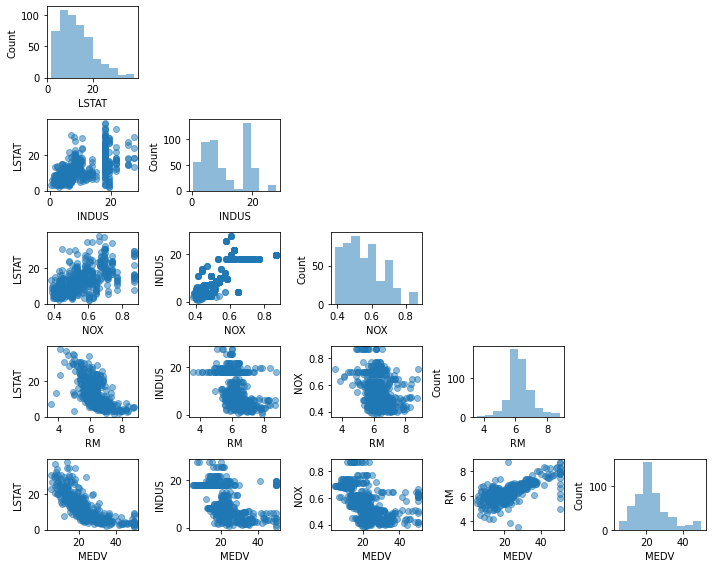

In [243]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
# 変数のペアの関係をプロット：dfはDataFrameオブジェクト
scatterplotmatrix(df[cols].values, figsize=(10,8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

In [244]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 6.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [245]:
# colabだとバージョンが0.14.0までしか上げられない
# ローカルだと0.19.0が最新でヒートマップの実行もうまくいく
import mlxtend
mlxtend.__version__

'0.14.0'

In [246]:
# from mlxtend.plotting import heatmap
# import numpy as np
# cm = np.corrcoef(df[cols].values.T)
# hm = heatmap(cm, row_names=cols, column_names=cols)
# plt.show()

In [247]:
# 基本的な線形回帰モデル：第２章のAdalineGDクラスを参照
class LinearRegressionGD(object):
    
    # 初期化を実行する__init__
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta # 学習率
        self.n_iter = n_iter # 訓練回数

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) # 重みを初期化
        self.cost_ = [] # コスト関数の値を初期化

        for i in range(self.n_iter):
            output = self.net_input(X) # 活性化関数の出力を計算
            errors = (y - output) # 誤差を計算
            self.w_[1:] += self.eta * X.T.dot(errors) # 重みw_[1]以降を更新
            self.w_[0] += self.eta * errors.sum() # 重みw_[0]を更新
            cost = (errors**2).sum() / 2.0 # コスト関数を計算 
            self.cost_.append(cost) # コスト関数の値を格納
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [248]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

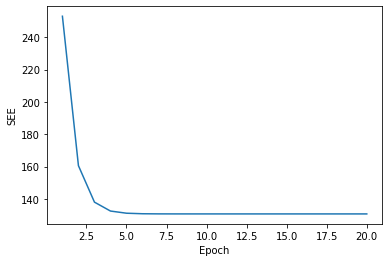

In [249]:
# エポック数とコスト関数を表す折れ線グラフ
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SEE')
plt.xlabel('Epoch')
plt.show()

In [250]:
def lin_regplot(X,y, model):
  plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return None

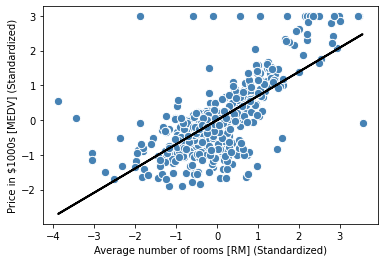

In [251]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (Standardized)')
plt.ylabel('Price in $1000s [MEDV] (Standardized)')
plt.show()

In [252]:
# num_room_std = sc_x.transform(np.array([[5.0]]))
# price_std = lr.predict(num_room_std)
# print('Price in $1000s: %.3f' % sc_y.inverse_transform(price_std))

num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
# price_std -> price_std.reshape(-1, 1)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std.reshape(-1, 1)))

Price in $1000s: 10.840


In [253]:
print('Sloope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Sloope: 0.695
Intercept: -0.000


In [254]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Sloope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Sloope: 9.102
Intercept: -34.671


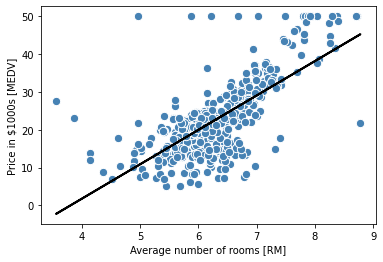

In [255]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [256]:
# '1'で構成された列ベクトルを追加
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
print('Sloope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Sloope: 9.102
Intercept: -34.671


In [257]:
from sklearn.linear_model import RANSACRegressor
# RANSACモデルをインスタンス化
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

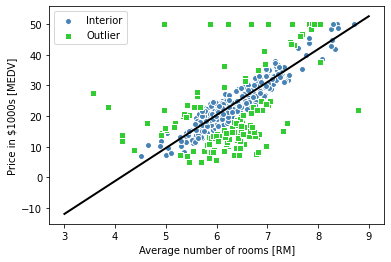

In [258]:
inlier_mask = ransac.inlier_mask_ # 正常値を表す真偽値を取得
outerior_mask = np.logical_not(inlier_mask) # 外れ値を表す真偽値を取得
line_X = np.arange(3, 10, 1) # 3から9までの整数値を作成
line_y_ransac = ransac.predict(line_X[:, np.newaxis]) # 予測値を計算
# 正常値をプロット
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Interior')
# 外れ値をプロット
plt.scatter(X[outerior_mask], y[outerior_mask], c='limegreen', edgecolor='white', marker='s', label='Outlier')
# 予測値をプロット
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [259]:
line_y_ransac

array([-11.89,  -1.15,   9.58,  20.32,  31.05,  41.79,  52.52])

In [260]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


In [261]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

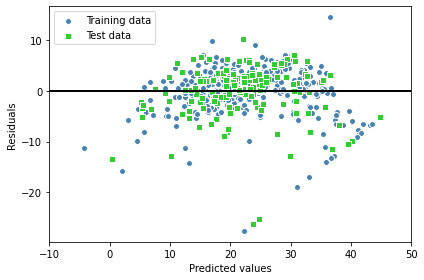

In [262]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [263]:
from sklearn.metrics import mean_squared_error
# 平均二乗誤差を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [264]:
from sklearn.metrics import r2_score
# R^2（決定係数）のスコアを出力
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [265]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # L2ペナルティ項の影響度合いを表す引数に指定

In [266]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [267]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [268]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2,390.8])
# 線形回帰（最小二乗法）モデルのクラスをインスタンス化
lr = LinearRegression()
pr = LinearRegression()
# 2次の多項式特徴量のクラスをインスタンス化
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [269]:
lr.fit(X, y)
# np.newaxisで列ベクトルにする
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
# 予測値を計算
y_lin_fit = lr.predict(X_fit)

In [270]:
pr.fit(X_quad, y)
# 2次式でyの値を計算
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

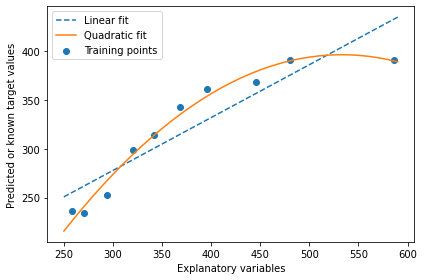

In [271]:
# 散布図、線形回帰モデル、多項式回帰モデルの結果をプロット
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variables')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [272]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


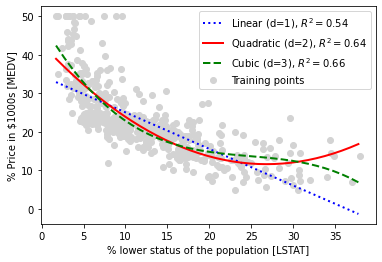

In [273]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

# 2次と３次の特徴量を作成
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 特徴量の学習、予測、決定係数
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# ２次の特徴量の学習、予測、決定係数の計算
regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# 3次の特徴量の学習、予測、決定係数の計算
regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# 各モデルの結果をプロット
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='Linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='Cubic (d=3), $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('% Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

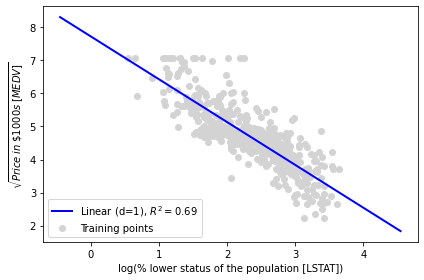

In [274]:
# 特徴量を変換
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 射影したデータを使った学習結果をプロット
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='Linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

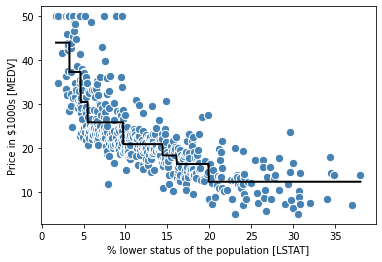

In [280]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
# 決定木回帰モデルのクラスをインスタンス化：max_depthで決定木の深さを指定
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
# argsortはソート後のインデックスを返し、flattenは１次元の配列を返す
sort_idx = X.flatten().argsort()
# 10.3.1項で定義したlin_regplot関数により、散布図と回帰直線を作成
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [282]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn.ensemble import RandomForestRegressor
# ランダムフォレスト回帰のクラスをインスタンス化
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSE（平均二乗誤差）を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# R^2（決定係数）を出力
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


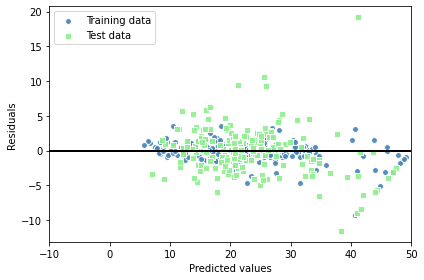

In [285]:
# 予測値と残差をプロット
plt.scatter(y_train_pred, # グラフのx値（予測値）
            y_train_pred - y_train, # グラフのy値（予測値と訓練値の差）
            c='steelblue', # プロットの色
            edgecolor='white', # プロットの線の色
            marker='o', # マーカーの種類
            s=35, # マーカーのサイズ
            alpha=0.9, # 透過度
            label='Training data') # ラベルの文字
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

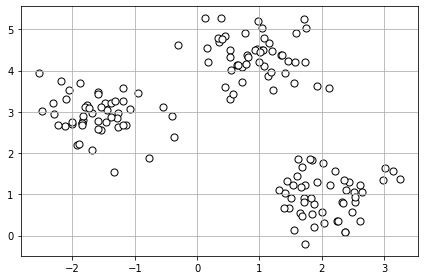

In [289]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, # データ点の総数
                  n_features=2, # 特徴量の個数
                  centers=3, # クラスタの個数
                  cluster_std=0.5, # クラスタ内の標準偏差
                  shuffle=True, # データ点をシャッフル
                  random_state=0) # 乱数生成器の状態を指定
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [291]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, # クラスタの個数
            init='random', # セントロイドの初期値をランダムに選択
            n_init=10, # 異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
            max_iter=300, # k-meansアルゴリズム内部の最大イテレーション回数
            tol=1e-04, # 収束と判定するための相対的な許容誤差
            random_state=0) # セントロイドの初期値に用いる乱数生成の状態
y_km = km.fit_predict(X) # クラスタ中心の計算と各データ点のインデックスの予測

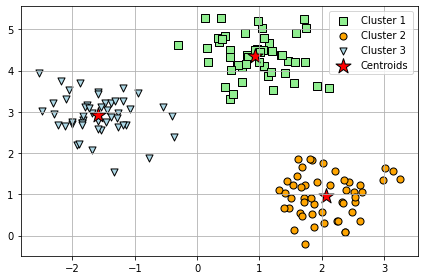

In [301]:
plt.scatter(X[y_km==0, 0], # グラフのxの値
            X[y_km==0, 1], # グラフのyの値
            s=50, # プロットのサイズ
            c='lightgreen', # プロットの色
            edgecolor='black', # プロットの線の色
            marker='s', # マーカーの形
            label='Cluster 1') # ラベルの色
plt.scatter(X[y_km==1, 0], 
            X[y_km==1, 1], 
            s=50, 
            c='orange', 
            edgecolor='black', 
            marker='o', 
            label='Cluster 2') 
plt.scatter(X[y_km==2, 0], 
            X[y_km==2, 1], 
            s=50, 
            c='lightblue', 
            edgecolor='black', 
            marker='v', 
            label='Cluster 3') 
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1], 
            s=250, 
            marker='*', 
            c='red', 
            edgecolor='black', 
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [302]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


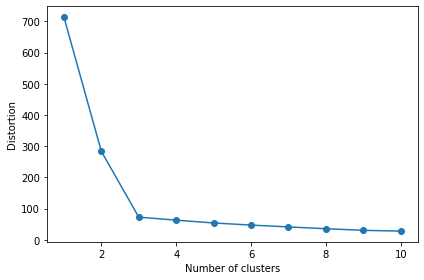

In [303]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, 
              init='k-means++', # k-means++法によりクラスタ中心を選択
              n_init=10, 
              max_iter=300, 
              random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

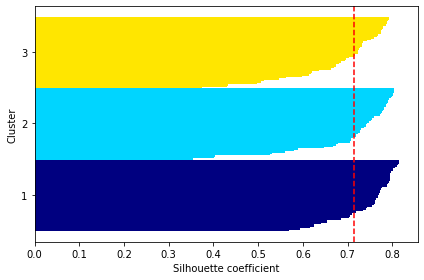

In [312]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km) # y_kmの要素の中で重複をなくす
n_clusters = cluster_labels.shape[0] # 配列の長さを返す
# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters) # 色の値をセット
  plt.barh(range(y_ax_lower, y_ax_upper), # 水平の棒グラフを描画（底辺の範囲を指定）
           c_silhouette_vals, # 棒の幅
           height=1.0, # 棒の高さ
           edgecolor='none', # 棒の端の色
           color=color) # 棒の色
  yticks.append((y_ax_lower + y_ax_upper) / 2.) # クラスタラベルの表示位置を追加
  y_ax_lower += len(c_silhouette_vals) # 底辺の値に棒を追加

silhouette_avg = np.mean(silhouette_vals) # シルエット係数の平均値
plt.axvline(silhouette_avg, color='red', linestyle='--') # 係数の平均値に波線を引く
plt.yticks(yticks, cluster_labels + 1) # クラスターラベルを表示
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

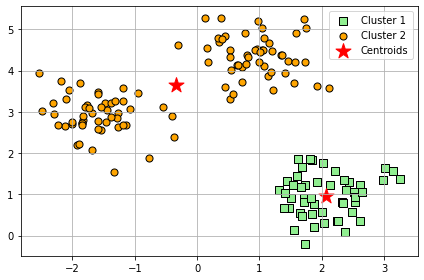

In [313]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0, 0], # グラフのxの値
            X[y_km==0, 1], # グラフのyの値
            s=50, # プロットのサイズ
            c='lightgreen', # プロットの色
            edgecolor='black', # プロットの線の色
            marker='s', # マーカーの形
            label='Cluster 1') # ラベルの色
plt.scatter(X[y_km==1, 0], 
            X[y_km==1, 1], 
            s=50, 
            c='orange', 
            edgecolor='black', 
            marker='o', 
            label='Cluster 2') 
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1], 
            s=250, 
            marker='*', 
            c='red', 
            label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

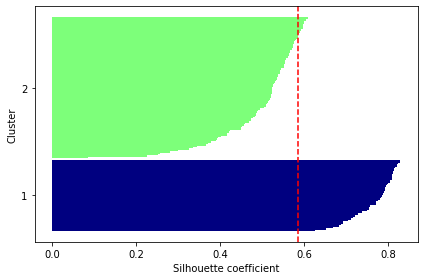

In [315]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()